In [2]:
# importing all needed functions
import os
import shutil
import json
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
from fast_histogram import histogram1d
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
from astropy.io import ascii
import matplotlib.patches as mpatches
from matplotlib import rc,rcParams
from astropy.table import Table
%matplotlib inline
# %matplotlib notebook
from astropy.io import fits
from numpy import arange
import json
import subprocess
from Calculating_det_angles import estimate_source_angles_detectors #importing ma'ams function
import matplotlib.image as mpimg

# importing all needed functions
import os
from pathlib import Path
from astropy.io import fits
import numpy as np
import glob
import time
from Tools import tools
import traceback
from tqdm import tqdm
import matplotlib.pyplot as plt
from numba import jit
import os
import shutil
import line_profiler
from scipy import stats
from line_profiler import profile
%load_ext line_profiler
import pwkit.bblocks
import sys
import pandas as pd

import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", message="Polyfit may be poorly conditioned")


In [3]:
# Getting the path the data directory from json file
# Specify the path to your JSON file
json_file_path = "data_path.json"

# Read the JSON file
with open(json_file_path, 'r') as file:
    data = json.load(file)

# Access the path from the JSON data
path_value = data.get("data_path", "")

# Print or use the path as needed
print("data_path:", path_value)


data_path: C:\Users\arpan\OneDrive\Documents\GRB\data


In [1]:
# To download new sample data 

def create_folder(folder): # to create the file to store data in
    print(folder)
    try:
        shutil.rmtree(folder)
        print(f"Folder '{folder}' and its contents removed successfully.")
    except FileNotFoundError:
        print(f"Folder '{folder}' not found.")
    except OSError as e:
        print(f"An error occurred: {e}")
    try:
        os.mkdir(folder)
        print(f"Folder '{folder}' created successfully.")
    except FileExistsError:
        print(f"Folder '{folder}' already exists.")
    except Exception as e:
        print(f"An error occurred: {e}")


folder_name = "Sample_GRB2" #input("Enter the name of the folder you want to create: ")
name = 'bn220730659'
year = '2022/'

folder_path = os.path.join(path_value, folder_name)

create_folder(folder_path)
    
# Fetching data


# URL of the file you want to download
url1 = "wget -q -nH --no-check-certificate --cut-dirs=7 -r -l0 -c -N -np -A fit -R 'index*' -erobots=off --retr-symlinks https://heasarc.gsfc.nasa.gov/FTP/fermi/data/gbm/triggers/"+year+name+'//current/'
url2 = "wget -q -nH --no-check-certificate --cut-dirs=7 -r -l0 -c -N -np -R 'index*' -erobots=off --retr-symlinks https://heasarc.gsfc.nasa.gov/FTP/fermi/data/gbm/triggers/"+year+name+'//quicklook/'

# Directory where you want to save the downloaded file
download_folder = folder_path

# Construct the wget command
wget_command1 = f"{url1} -P {download_folder}"
wget_command2 = f"{url2} -P {download_folder}"

try:
    # Run the wget command
    subprocess.run(wget_command2, shell=True, check=True)
    print(f"Downloaded {url2} to {download_folder}")
except subprocess.CalledProcessError as e:
    print(f"Error downloading the file: {e}")
except Exception as e:
    print(f"An error occurred: {e}")
    
try:
    # Run the wget command
    subprocess.run(wget_command1, shell=True, check=True)
    print(f"Downloaded {url1} to {download_folder}")
except subprocess.CalledProcessError as e:
    print(f"Error downloading the file: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

data_path: C:\Users\arpan\OneDrive\Documents\GRB\data
C:\Users\arpan\OneDrive\Documents\GRB\data\Sample_GRB2
Folder 'C:\Users\arpan\OneDrive\Documents\GRB\data\Sample_GRB2' and its contents removed successfully.
Folder 'C:\Users\arpan\OneDrive\Documents\GRB\data\Sample_GRB2' created successfully.
Downloaded wget -q -nH --no-check-certificate --cut-dirs=7 -r -l0 -c -N -np -R 'index*' -erobots=off --retr-symlinks https://heasarc.gsfc.nasa.gov/FTP/fermi/data/gbm/triggers/2022/bn220730659//quicklook/ to C:\Users\arpan\OneDrive\Documents\GRB\data\Sample_GRB2
Downloaded wget -q -nH --no-check-certificate --cut-dirs=7 -r -l0 -c -N -np -A fit -R 'index*' -erobots=off --retr-symlinks https://heasarc.gsfc.nasa.gov/FTP/fermi/data/gbm/triggers/2022/bn220730659//current/ to C:\Users\arpan\OneDrive\Documents\GRB\data\Sample_GRB2


200.4833 -67.1833
from trigdat file glg_trigdat_all_bn220730659_v01.fit
n0 105 ; n1 86 ; n2 44 ; n3 144 ; n4 138 ; n5 90 ; n6 132 ; n7 140 ; n8 134 ; n9 84 ; na 42 ; nb 90 ; b0 93 ; b1 87 ; LAT-LLE 120 ; LAT 120 ;  
The brightest NaI detector is na - Source angle is: 42 deg
The brightest 3 NaI detectors are na ( 42 deg) n2 ( 44 deg) n9 ( 84 deg)


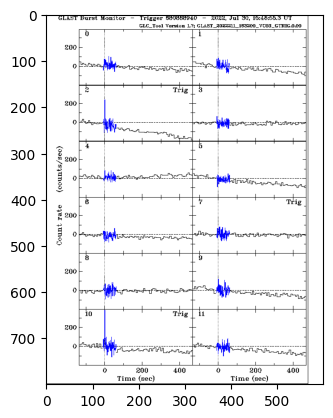

In [4]:
# Finding most suitable detector

# select which sample data to work on
folder_name = "Sample_GRB2"
folder_path = os.path.join(path_value, folder_name)

# finding all TTE files
directory_path = folder_path+"\\current"
target_string = "_tte_n"
trig_string = "_trigdat_"

# Finding NaI detectors
trig_pattern = os.path.join(directory_path, f"*{trig_string}*")
trigdat_file = glob.glob(trig_pattern)

# Get the spacecraft pointing        from here 
event_filename = trigdat_file[0]

# Getting the RA and DEC
pha_list = fits.open(event_filename, memmap=True)
ra_obj,dec_obj = (pha_list[0].header['RA_OBJ']) ,	(pha_list[0].header['DEC_OBJ'])
print(ra_obj,dec_obj)

# Use the glob module to search for TTE files in the directory
file_pattern = os.path.join(directory_path, f"*{target_string}*")
matching_files = glob.glob(file_pattern)

hdul = fits.open(matching_files[0])



print('from trigdat file',event_filename.split('\\')[-1]) # just to verify that the correct file is checked to get the ra and dec

brightest_nai, bright_nais, brightest_bgo = estimate_source_angles_detectors.angle_to_grb(ra_obj,dec_obj,event_filename) # Getting the values

# till here

# displaying the quicklook

quicklook_dir = directory_path = folder_path+"\\quicklook"

# List all files in the directory
files = os.listdir(quicklook_dir)

# Filter the list to include only files with the string in their name
lc_all_files = [file for file in files if "_lc_all_" in file]

# Load the GIF
img = mpimg.imread(quicklook_dir+"\\"+lc_all_files[0])

# Display the GIF
plt.imshow(img)
plt.show()

NaI_detector = matching_files[0]
for string in matching_files:
    if '_'+brightest_nai+'_' in string:
        NaI_detector = string

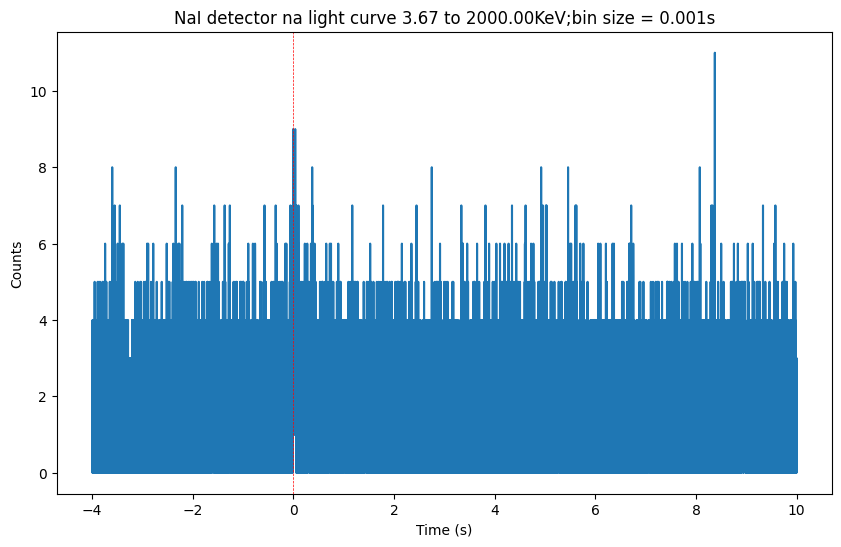

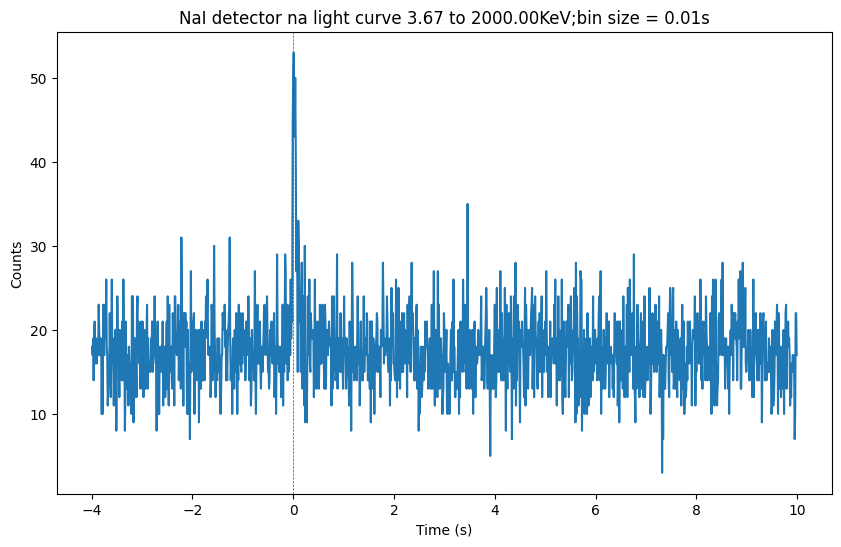

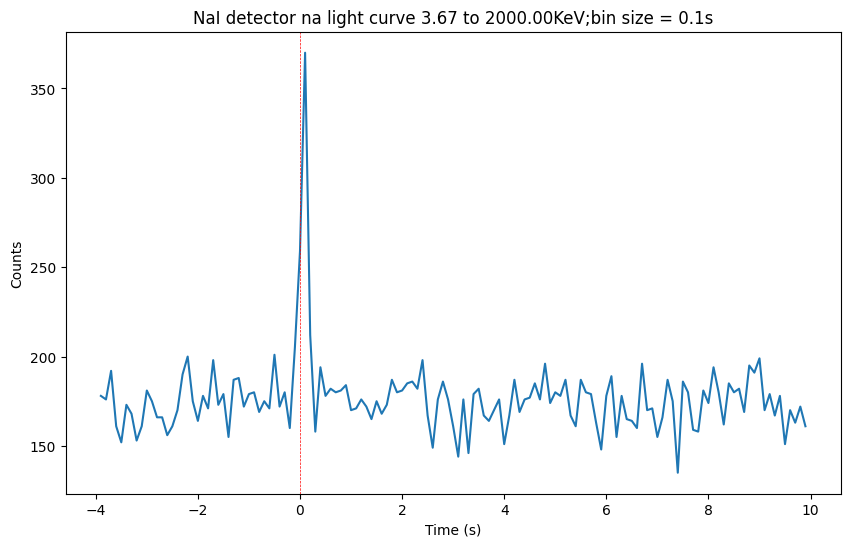

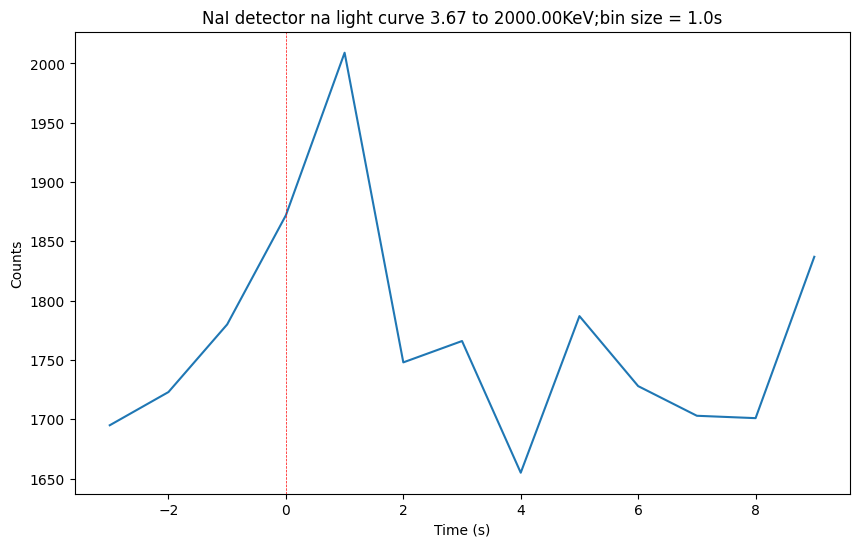

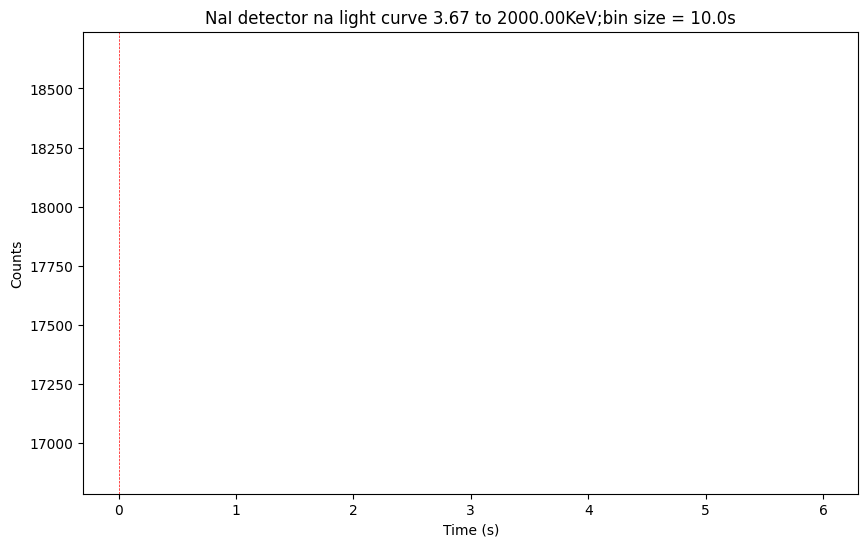

In [5]:
# Plotting the light curve
# Open the FITS file
hdul = fits.open(NaI_detector)

# Getting the trigger time
header_string = hdul[0].header.tostring()
position = header_string.find('TRIGTIME')
trigger_time=float(header_string[position+14:position+14+16])

# fetchinng data
energy_channel_data = hdul[1].data
all_count_data = np.array(hdul[2].data)

# getting counts accross all energy channels
counts = [float(sublist[0]) for sublist in all_count_data]


for i in np.arange(0,5,1):
    # Define the range and number of bins
    range_min = -4  #min(counts)
    range_max =  10 #max(counts)
    # bin_no = 
    bin_size = 0.001*10**i  # (range_max - range_min)/bin_no  

    # finding the background
    bg_bin_edges = np.arange(-22, -5, bin_size)
    bg_hist, bg_edges = (np.histogram(counts, bins = bg_bin_edges))
    mean = sum(bg_hist)/len(bg_hist)

    # Create bin edges
    bin_edges = np.arange(range_min, range_max, bin_size)

    # Finding energy channel range
    energy_channel_range = f"{energy_channel_data[0][1]:.2f} to {energy_channel_data[-1][-1]:.2f}KeV"

    # Create the histogram using numpy.histogram
    hist, edges = np.histogram(counts, bins=bin_edges)

    # print('mean',mean)
    # # finding likilihood of observations
    # log_likelihood = 0
    # for observed in hist:
    #     if mean < 10:
    #         likelihood = (math.exp(-mean) * mean**observed) / math.factorial(observed)
    #         log_likelihood = log_likelihood -mean + observed * math.log(mean) - math.log(math.factorial(observed))
    #     else:
    #         likelihood = (1 / (mean * math.sqrt(2 * math.pi))) * math.exp(-(observed - mean)**2 / (2 * mean**2))
    #         log_likelihood = log_likelihood -(0.5 * math.log(2*math.pi)) - (0.5*math.log(mean)) - (1/(2*mean) * (observed - mean))
    # print('log likelihood',log_likelihood)

    # mean = hist [0]
    # threshold = 1/8
    # for i in range(1,len(hist)):
    #     observed = hist[i]
    #     likelihood1 = (math.exp(-mean) * mean**observed) / math.factorial(observed)
    #     likelihood2 = (math.exp(-observed) * observed**observed) / math.factorial(observed)
    #     l_ratio = likelihood2 / likelihood1
    #     if l_ratio > threshold:
    #         mean =  (mean + observed) / i+1
    #     else:
    #         print('flag')
        
    # Plot the histogram
    plt.figure(figsize=(10,6))
    plt.plot(edges[1:],hist)
    # plt.hist(counts, bins=bin_edges,histtype='step', edgecolor='k', alpha=0.7, linewidth=1)
    plt.xlabel('Time (s)')
    plt.ylabel('Counts')
    # bin_size=str(" ;bin size:",float(bin_size))
    plt.title(f'NaI detector {brightest_nai} light curve ' + energy_channel_range+f";bin size = {bin_size}s")

    # Add a vertical line at x=0
    plt.axvline(x=0, color='red', linestyle='--',linewidth=0.5)

    # Show the plot
    plt.show()

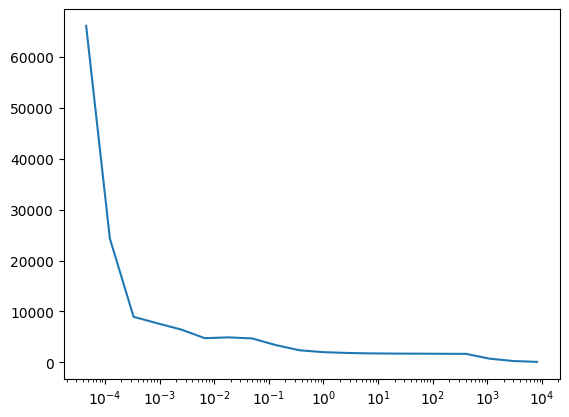

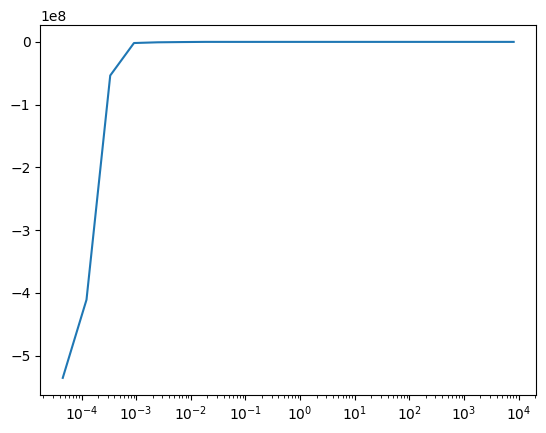

4.5399929762484875e-05


In [6]:
x=[]
y=[]
max_rate = 0

for i in range(-10,10):
    size = np.e ** i
    x.append(size)
    rate = histogram1d(counts, range=[0, size],bins=1)[0]/size
    y.append(rate)
    if rate > max_rate:
        max_rate = rate

# finding the index of max rate
max_index = y.index(max_rate)

# finding the corresponding x value
x_max = x[max_index]

plt.plot(x,y)
plt.xscale('log')
plt.show()

# Calculate the derivative using numpy.gradient
dy_dx = np.gradient(y, x)

plt.plot(x,dy_dx)
plt.xscale('log')
plt.show()
print(x_max)


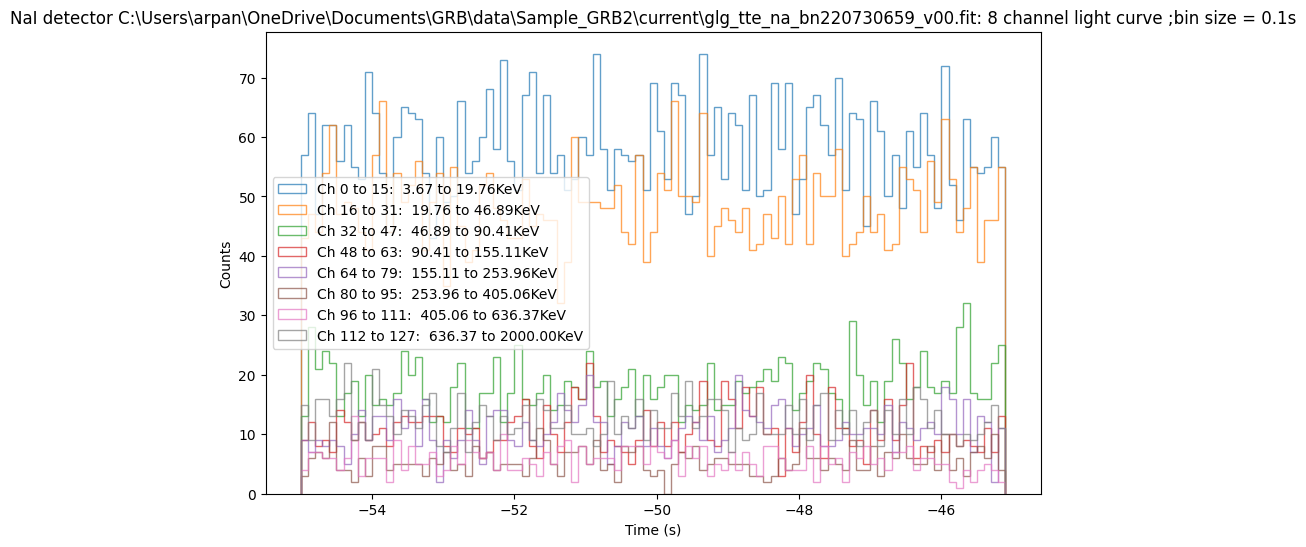

In [7]:
#Multichannel LightCurve

channel_number = 8 # set to number of desired channels

# fetchinng data
energy_channel_data = hdul[1].data
all_count_data = np.array(hdul[2].data)

channel_start = 0
channel_stop = int(128/channel_number)


# Define the range and number of bins
range_min = -55
range_max = -45
bin_size = 0.1  # Adjust the size of bins as needed

# Create bin edges centered around 0
bin_edges = np.arange(range_min, range_max, bin_size)

plt.figure(figsize=(10,6))
for i in range(channel_number):
    channels = list(np.arange(channel_start,channel_stop,1))
    counts = [float(count[0]) for count in all_count_data if int(count[1]) in channels]

    energy_range = f"{energy_channel_data[channels[0]][1]:.2f} to {energy_channel_data[channels[-1]][-1]:.2f}KeV"
    
    # Plot the histogram
    plt.hist(counts, bins=bin_edges,histtype='step', alpha=0.7, linewidth=1,label = f'Ch {channels[0]} to {channels[-1]}:  ' + energy_range)

    channel_start = channel_stop
    channel_stop = (i+2)*int(128/channel_number)
    

plt.xlabel('Time (s)')
plt.ylabel('Counts')
plt.title(f'NaI detector {NaI_detector}: {channel_number} channel light curve '+f";bin size = {bin_size}s")
plt.legend()

# Add a vertical line at x=0
# plt.axvline(x=0, color='red', linestyle='--',linewidth=0.5)

# Show the plot
plt.show()


In [ ]:
from scipy.optimize import minimize
from scipy.special import factorial

def log_likelihood(observed, expected_mean):
    """
    Calculate the log-likelihood assuming a Poisson distribution.

    Parameters:
    - observed: An array of observed values.
    - expected_mean: The expected mean of the Poisson distribution.

    Returns:
    - log_likelihood: The sum of log-likelihood values for all observations.
    """
    expected_mean = (expected_mean[0])
    sum = 0 
    for i in observed:
        try:
            sum = sum + (math.log(expected_mean) - 2 * math.log(i) - expected_mean/i)
        except:
            pass
    return sum

from scipy.optimize import minimize_scalar

def log_der(x):
    return 2*x + 2

# Find the minimum using the derivative
result = minimize_scalar(my_function, method='bounded', bounds=(-10, 10), jac=my_derivative)

# Print the result
print("Minimum value:", result.fun)
print("Minimizer:", result.x)


def find_maximum_likelihood(observed):
    """
    Find the parameter that maximizes the Poisson likelihood for multiple observations.

    Parameters:
    - observed: An array of observed values.

    Returns:
    - max_likelihood_params: The parameter that maximizes the likelihood.
    """
    # Define a function to minimize (negative log-likelihood)
    neg_log_likelihood = lambda x: -log_likelihood(observed, x)

    # Make an initial guess for the parameter
    initial_guess = sum(observed)/len(observed)

    # Minimize the negative log-likelihood
    result = minimize(neg_log_likelihood, initial_guess, method='BFGS')

    # Extract the parameter that maximizes the likelihood
    max_likelihood_params = result.x[0]

    if result.success:
        return max_likelihood_params
    else:
        print('error')
        quit()

def joint_likelihood(x,t):
    """
    returns the value of likelihood function

    Parameters:
    - x: An array of observed values.
    - t: parameter

    Returns:
    - value: The value of likelihood function
    """
    L = 1
    for i in x:
        L = L * (t * math.exp(-t / i) / i**2)
    return L

x=[]
min_log = 0
for i in range(1,len(counts)):
    x.append(1/(counts[i]-counts[i-1]))
    t = (find_maximum_likelihood(x))
    # print(x[i-1] , t)
    # print(joint_likelihood(x,t))
    # print(log_likelihood(x,[t]))
    # if i > 5:
    #     break
    


118.45472132397587 118.45472132397587
0.003105654524020914
-5.774530789025092
38.73268167903332 58.37659910020771
2.190965555524686e-05
-10.728583125372904
1730.3234323432343 -27.70511494190771
-8.858128492650995e-10
0
1173.7243598712746 112.07506389747958
3.328369866174948e-14
-31.03370864746025
83.26327073490293 -56.11872380814248
-1.3444149732017354e-14
0
243.663636099573 -169.0406284543111
4.148821453956167e-12
0
945.1952676056338 -115.57805794616087
-3.884682200290746e-18
0
66.52504024679413 -398.5557057093796
2.544310161825442e-06
0
174.64259987924967 -132.55789296084367
-5.075057586730194e-20
0
60.657348421851836 110.97620781680101
8.11525002120213e-31
-69.28639287256351
394.0163457022076 118.73445779597428
4.485873742888301e-34
-76.78695987079281
102.2489730744384 117.16620340553581
1.596823899236618e-36
-82.42504675436578
72.54761348796582 111.86790228154601
7.170590816161024e-39
-87.83083057441283
252.91268692715872 116.50903039233089
8.150413088353894e-42
-94.61050529409405


TypeError: bad operand type for unary -: 'NoneType'

: 